In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('bank-full.csv', header=None)

In [ ]:
df.head()

,0
0,"age;""job"";""marital"";""education"";""default"";""bal..."
1,"58;""management"";""married"";""tertiary"";""no"";2143..."
2,"44;""technician"";""single"";""secondary"";""no"";29;""..."
3,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
4,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."


In [ ]:
df_cleaned = df[0].str.split(';',expand=True)

In [ ]:
df_cleaned.columns = df_cleaned.iloc[0]

In [ ]:
df_cleaned = df_cleaned[1:].reset_index().drop('index', axis=1)

In [ ]:
df_cleaned.head()

,age,"""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [ ]:
df = df_cleaned

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  object
 1   "job"        45211 non-null  object
 2   "marital"    45211 non-null  object
 3   "education"  45211 non-null  object
 4   "default"    45211 non-null  object
 5   "balance"    45211 non-null  object
 6   "housing"    45211 non-null  object
 7   "loan"       45211 non-null  object
 8   "contact"    45211 non-null  object
 9   "day"        45211 non-null  object
 10  "month"      45211 non-null  object
 11  "duration"   45211 non-null  object
 12  "campaign"   45211 non-null  object
 13  "pdays"      45211 non-null  object
 14  "previous"   45211 non-null  object
 15  "poutcome"   45211 non-null  object
 16  "y"          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [ ]:
df.columns = df.columns.str.lower().str.replace('"','')

In [ ]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace('"','')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
columns = ['age','job','marital','education','balance','housing','contact','day','month','duration','campaign','pdays','previous','poutcome','y']

In [ ]:
new_df = df[columns]

In [ ]:
new_df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  object
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  object
 8   month      45211 non-null  object
 9   duration   45211 non-null  object
 10  campaign   45211 non-null  object
 11  pdays      45211 non-null  object
 12  previous   45211 non-null  object
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: object(15)
memory usage: 5.2+ MB


In [ ]:
new_df.education.mode()

0    secondary
Name: education, dtype: object

In [ ]:
df.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12061,41,entrepreneur,married,tertiary,no,306,yes,no,unknown,20,jun,102,3,-1,0,unknown,no


In [ ]:
numerical_col = ['age','balance','day','duration','campaign','pdays','previous']

In [ ]:
new_df[numerical_col] = new_df[numerical_col].astype(int)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int32 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int32 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int32 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int32 
 10  campaign   45211 non-null  int32 
 11  pdays      45211 non-null  int32 
 12  previous   45211 non-null  int32 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int32(7), object(8)
memory usage: 4.0+ MB


<Axes: xlabel='0', ylabel='0'>

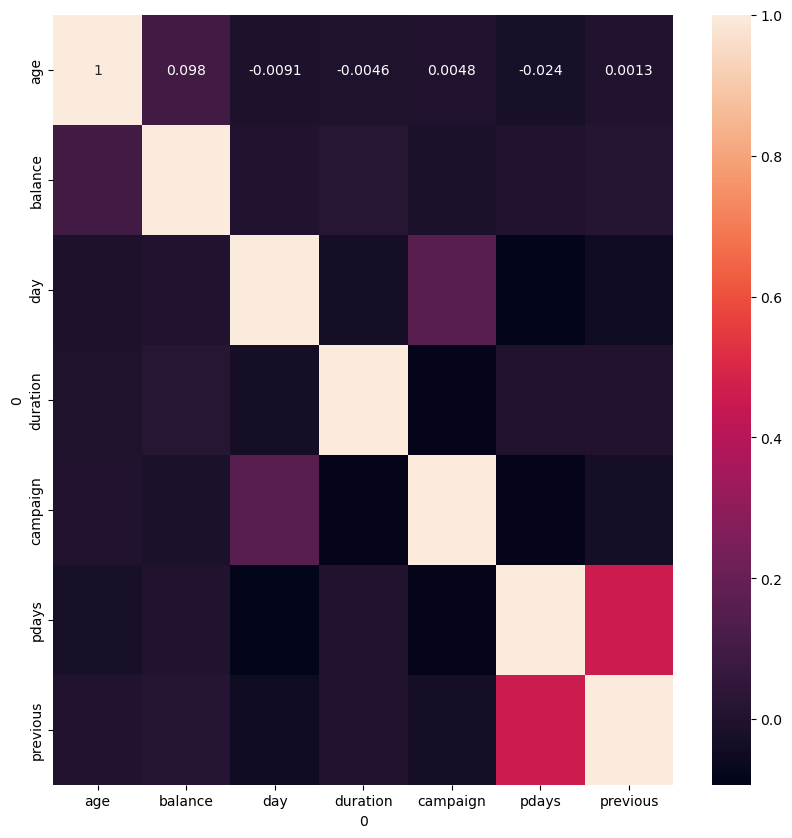

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df[numerical_col].corr(),annot=True)

In [ ]:
new_df['target'] = new_df.y == 'yes'

C:\Users\DAMOLA\AppData\Local\Temp\ipykernel_9008\2936882493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = new_df.y == 'yes'


In [ ]:
new_df.y = new_df.target.astype('int')

C:\Users\DAMOLA\AppData\Local\Temp\ipykernel_9008\4166246254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.y = new_df.target.astype('int')


In [ ]:
new_df.drop('target',axis=1,inplace=True)

C:\Users\DAMOLA\AppData\Local\Temp\ipykernel_9008\530697464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('target',axis=1,inplace=True)


In [ ]:
new_df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
full_train, test = train_test_split(new_df, test_size=0.2, random_state=42)

In [ ]:
train, val = train_test_split(full_train, test_size=0.25, random_state=1)

In [ ]:
df_train = train.drop('y',axis=1)
y_train = train.y

df_val = val.drop('y',axis=1)
y_val = val.y

df_test = test.drop('y',axis=1)
y_test = test.y

In [ ]:
cat_col = list(full_train.dtypes[full_train.dtypes=='object'].index)
cat_col

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mutual_info_score(train.marital,train.y)

0.0020189759359465972

In [ ]:
def mutual_feat_score(series):
    return mutual_info_score(series,full_train.y)

In [ ]:
mi = full_train[cat_col].apply(mutual_feat_score)
print(round(mi.sort_values(ascending=False),2))

0
poutcome     0.03
month        0.02
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64


In [ ]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train[cat_col+numerical_col].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)

X_train.shape

(28934, 47)

In [ ]:
val_dicts = df_val[cat_col+numerical_col].to_dict(orient='records')

X_val = dv.transform(val_dicts)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, y_pred)

0.9012994194083495

In [ ]:
def train_log_reg(column):
    train_dicts = df_train.drop(column,axis=1).to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    val_dicts = df_val.drop(column,axis=1).to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    print('Dropped column: %s, Accuracy score: %s' %(column, score))

In [ ]:
train_log_reg('age')

Dropped column: age, Accuracy score: 0.9017141277301631


In [ ]:
train_log_reg('balance')

Dropped column: balance, Accuracy score: 0.901022947193807


In [ ]:
train_log_reg('marital')

Dropped column: marital, Accuracy score: 0.9015758916228919


In [ ]:
train_log_reg('previous')

Dropped column: previous, Accuracy score: 0.9012994194083495


In [ ]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [ ]:
for c in [0.01, 0.1, 1, 10,100]:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    print(f'C: {c}, Score: {score}')

C: 0.01, Score: 0.8989494055847387
C: 0.1, Score: 0.9011611833010782
C: 1, Score: 0.9012994194083495
C: 10, Score: 0.901022947193807
C: 100, Score: 0.9011611833010782
